In [2]:
1

1

In [3]:
from guided_diffusion.scheduler import get_schedule_jump

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
n_sample=2
jump_n_sample=5
t_T=250

In [7]:
import pickle

In [10]:
for j0,j1,r0,r1 in [[10,10,1,2],[10,10,2,1],[10,10,5,1],[10,10,1,5],[10,10,5,2],[10,10,2,5],[10,10,5,5]]:
    print(f'j-{j0}-{j1}-r-{r0}-{r1}')

j-10-10-r-1-2
j-10-10-r-2-1
j-10-10-r-5-1
j-10-10-r-1-5
j-10-10-r-5-2
j-10-10-r-2-5
j-10-10-r-5-5


In [35]:
times1=np.array(get_schedule_jump(t_T=250,n_sample=1,jump_length=1,jump_n_sample=10))
np.sum((times1[1:]-times1[:-1])<0)

2491

In [8]:
for j0,j1,r0,r1 in [[10,10,1,2],[10,10,2,1],[10,10,5,1],[10,10,1,5],[10,10,5,2],[10,10,2,5],[10,10,5,5]]:
    times1=np.array(get_schedule_jump(t_T=250,n_sample=1,jump_length=j0,jump_n_sample=r0))
    times1 = times1[:len(times1)//2]
    times2=np.array(get_schedule_jump(t_T=125,n_sample=1,jump_length=j1,jump_n_sample=r1))
    times_ = np.hstack([times1,times2])
    np.save(f'times/j-{j0}-{j1}-r-{r0}-{r1}.npy',times_)

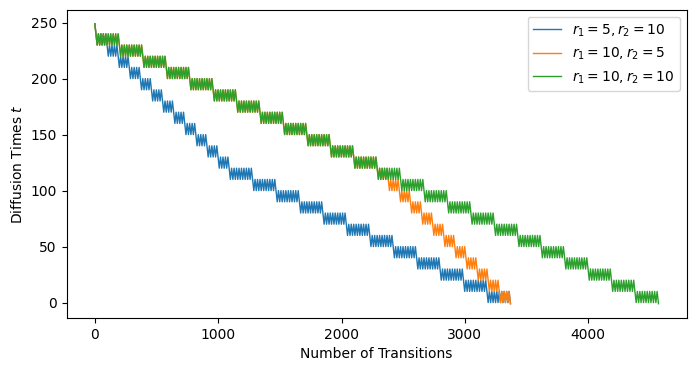

In [56]:
a1=np.load('times/j-10-10-r-10-10.npy')
a2=np.load('times/j-10-10-r-1-10.npy')
a3=np.load('times/j-10-10-r-2-10.npy')
a4=np.load('times/j-10-10-r-5-10.npy')
a5=np.load('times/j-10-10-r-10-1.npy')
a6=np.load('times/j-10-10-r-10-2.npy')
a7=np.load('times/j-10-10-r-10-5.npy')
plt.subplots(1,1,figsize=(8,4))
# plt.plot(a1,linewidth=1, label='$r_1=10,  r_2=10$')
# plt.plot(a2,linewidth=1, label='$r_1=1,  r_2=10$')
# plt.plot(a3,linewidth=1, label='$r_1=2,  r_2=10$')
plt.plot(a4,linewidth=1, label='$r_1=5,  r_2=10$')
# plt.plot(a5,linewidth=1, label='$r_1=10,  r_2=1$')
# plt.plot(a6,linewidth=1, label='$r_1=10,  r_2=2$')
plt.plot(a7,linewidth=1, label='$r_1=10,  r_2=5$')
plt.plot(a1,linewidth=1, label='$r_1=10,  r_2=10$')
plt.ylabel('Diffusion Times $t$')
plt.xlabel('Number of Transitions')
plt.legend()

In [120]:
for j0,j1,r0,r1 in [[1,10,10,10],[2,10,10,10],[5,10,10,10],
                    [10,1,10,10],[10,2,10,10],[10,5,10,10],
                    [10,10,1,10],[10,10,2,10],[10,10,5,10],
                    [10,10,10,1],[10,10,10,2],[10,10,10,5],[10,10,10,10]]:
    times1=np.array(get_schedule_jump(t_T=250,n_sample=1,jump_length=j0,jump_n_sample=r0))
    times1 = times1[:len(times1)//2]
    times2=np.array(get_schedule_jump(t_T=125,n_sample=1,jump_length=j1,jump_n_sample=r1))
    times_ = np.hstack([times1,times2])
    np.save(f'times/j-{j0}-{j1}-r-{r0}-{r1}.npy',times_)

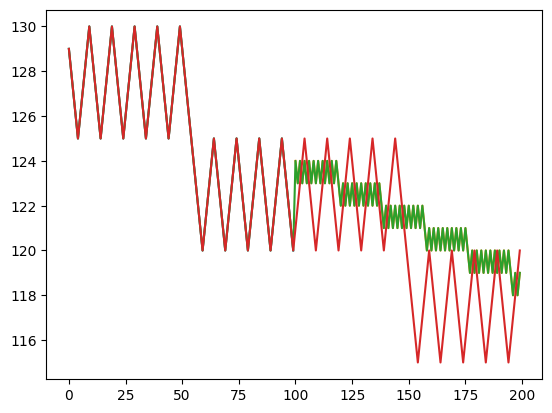

In [116]:
r0=5
r1=1
j0=10
j1=10
times1=np.array(get_schedule_jump(t_T=250,n_sample=1,jump_length=r0,jump_n_sample=j0))
times1 = times1[:len(times1)//2]
times2=np.array(get_schedule_jump(t_T=125,n_sample=1,jump_length=r1,jump_n_sample=j1))
times_ = np.hstack([times1,times2])

plt.plot(np.arange(s),times1[-s:])
plt.plot(np.arange(s)+s,times2[:s])
plt.plot(np.arange(s*2),times_[len(times1)-s:len(times1)+s])
times0=get_schedule_jump(t_T=250,n_sample=1,jump_length=r0,jump_n_sample=j0)
plt.plot(np.arange(s*2),times0[len(times1)-s:len(times1)+s])

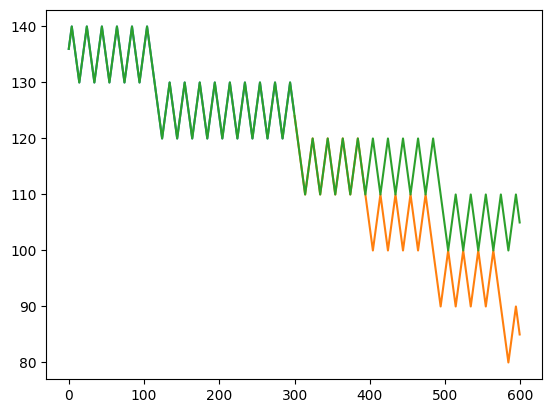

In [72]:
times1=np.array(get_schedule_jump(t_T=250,n_sample=1,jump_length=10,jump_n_sample=10))
times1 = times1[:len(times1)//2]
times2=np.array(get_schedule_jump(t_T=125,n_sample=1,jump_length=10,jump_n_sample=5))
times_ = np.hstack([times1,times2])
plt.plot(np.arange(300),times1[-300:])
plt.plot(np.arange(300)+300,times2[:300])
times0=get_schedule_jump(t_T=250,n_sample=1,jump_length=10,jump_n_sample=10)
plt.plot(np.arange(600),times0[len(times1)-300:len(times1)+300])

In [59]:
len(times1)

2286

In [31]:
times2

array([124, 123, 122, ...,   1,   0,  -1])

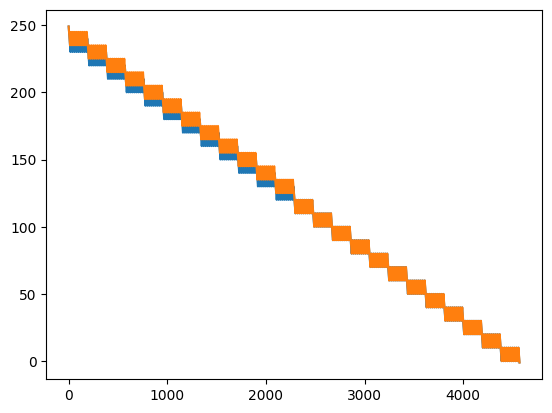

In [29]:
times1=get_schedule_jump(t_T=250,n_sample=1,jump_length=10,jump_n_sample=10)
plt.plot(times)
times1=np.array(get_schedule_jump(t_T=125,n_sample=1,jump_length=10,jump_n_sample=10))+125
times2=np.array(get_schedule_jump(t_T=125,n_sample=1,jump_length=10,jump_n_sample=10))
times_ = np.hstack([times1,times2])
plt.plot(times_)

p_sample変更点  
x = (
                    gt_keep_mask * (
                        weighed_gt
                    )
                    +
                    (1 - gt_keep_mask) * (
                        x
                    )
                )

4571
4661


1

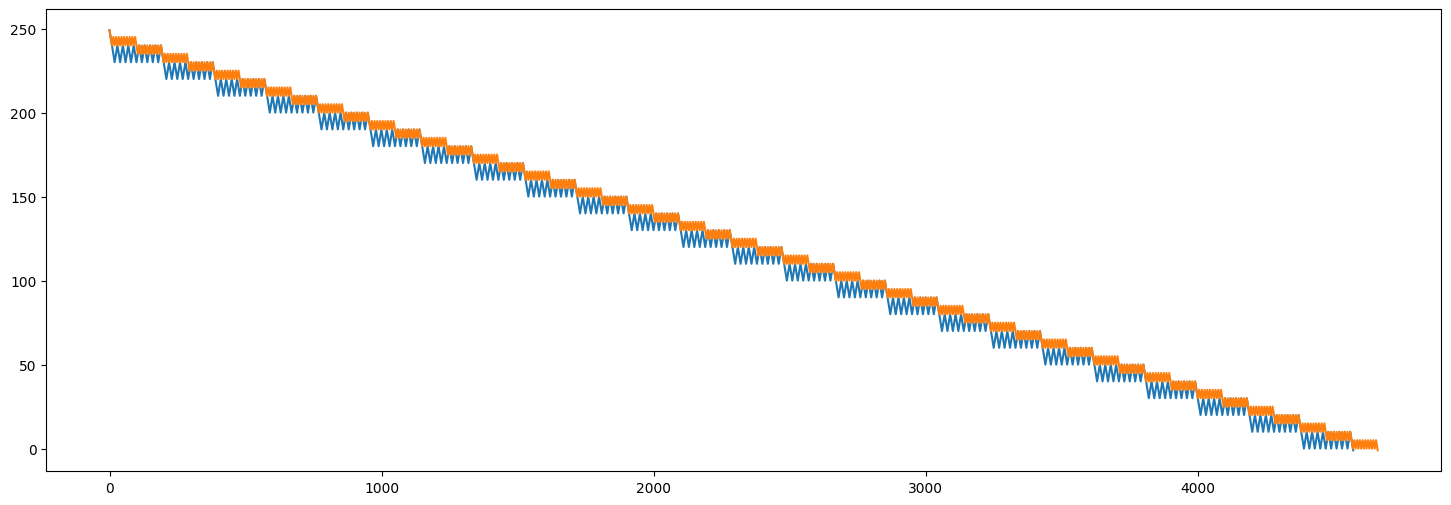

In [5]:
plt.subplots(1,1,figsize=(18,6))
times=get_schedule_jump(t_T=250,n_sample=1,jump_length=10,jump_n_sample=10)
plt.plot(times)
print(len(times))
times=get_schedule_jump(t_T=250,n_sample=1,jump_length=5,jump_n_sample=10)
plt.plot(times)
print(len(times))
# times=get_schedule_jump(t_T=250,n_sample=1,jump_length=1,jump_n_sample=1)
# plt.plot(times)
# print(len(times))
np.abs(np.array(times[:-1])-np.array(times[1:])).max()